In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [9]:
glass=pd.read_csv("C:\\Users\\Abhishek\\OneDrive\\Desktop\\Glass Identification.csv")

In [10]:
glass.head()

,Unnamed: 0,Ri,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  214 non-null    int64  
 1   Ri          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Ai          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Type        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [12]:
glass.describe()

,Unnamed: 0,Ri,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
glass.head(1)

,Unnamed: 0,Ri,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [16]:
from scipy import stats
glass=glass[(np.abs(stats.zscore(glass))<3).all(axis=1)]

In [17]:
len(glass)

194

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [20]:
y=glass['Type']
del glass['Type']

In [21]:
x=glass

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=324)

In [24]:
x_train.head()

,Unnamed: 0,Ri,Na,Mg,Ai,Si,K,Ca,Ba,Fe
25,26,1.51764,12.98,3.54,1.21,73.00,0.65,8.53,0.00,0.00
26,27,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.00,0.00
138,139,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00
64,65,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17


In [26]:
x_train.shape

(145, 10)

In [27]:
y_train.shape

(145,)

In [28]:
y_train.head()

25     1
26     1
138    2
64     1
141    2
Name: Type, dtype: int64

In [29]:
accuracy=[]

In [59]:
knn_ac=[1,2,3,4,5,6,7,8,9]
k_value=range(1,10)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [67]:
knn=KNeighborsClassifier(n_neighbors=2,p=2,metric='minkowski')
knn.fit(x_train,y_train)
predictions=knn.predict(x_test)
a=accuracy_score(y_true=y_test,y_pred=predictions)*100
accuracy.append(a)

In [68]:
for i in k_value:
    a=[]
    
    knn=KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski',weights='distance')
    knn.fit(x_train,y_train)
    predictions=knn.predict(x_test)
    a=accuracy_score(y_true=y_test,y_pred=predictions)*100
    accuracy.append(a)
    

Text(0.5, 1.0, 'Accuracy vs k_value')

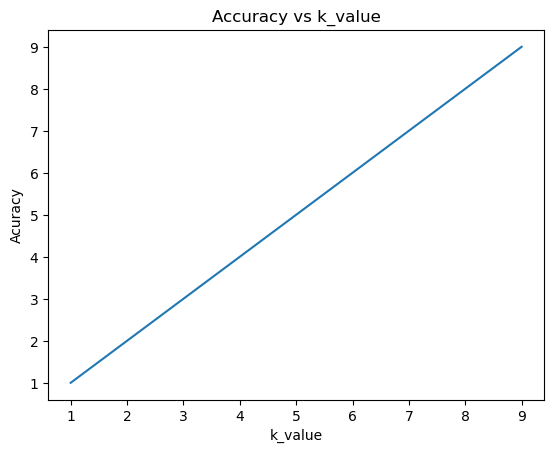

In [69]:
plt.plot(k_value,knn_ac)
plt.xlabel('k_value')
plt.ylabel('Acuracy')
plt.title('Accuracy vs k_value')

In [70]:
print("Size of k_value array:", len(k_value))
print("Size of knn_ac array:", len(knn_ac))


Size of k_value array: 9
Size of knn_ac array: 9


In [72]:
from sklearn.ensemble import RandomForestClassifier


In [77]:
a=[]

clf= RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
predictions=clf.predict(x_test)
a.append(accuracy_score(y_true=y_test,y_pred=predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)
    

100.0

In [78]:
a=[]

lgc= LogisticRegression(max_iter=100)
lgc.fit(x,y)
predictions=lgc.predict(x_test)
a.append(accuracy_score(y_true=y_test,y_pred=predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

C:\Users\Abhishek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0

In [79]:
a=[]


bnb.fit(x,y)
predictions=bnb.predict(x_test)
a.append(accuracy_score(y_true=y_test,y_pred=predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

NameError: name 'bnb' is not defined